In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
cd /content/drive/MyDrive/Colab Notebooks/Deep Learning Projects/Cat and Dog

/content/drive/MyDrive/Colab Notebooks/Deep Learning Projects/Cat and Dog


In [3]:
#! unzip archive.zip

In [4]:
import tensorflow
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Conv2D, MaxPool2D, Flatten
import pandas as pd
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score

In [5]:
import matplotlib.pyplot as plt

In [6]:
test_path = r'/content/drive/MyDrive/Colab Notebooks/DeepLearning Datasets Jan 31 2022/Cat and Dog/test_set/test_set'
training_path = r'/content/drive/MyDrive/Colab Notebooks/DeepLearning Datasets Jan 31 2022/Cat and Dog/training_set/training_set'

In [7]:
train_datagen = ImageDataGenerator(rescale = 1/255, shear_range=0.2, zoom_range=0.2, horizontal_flip=True)
test_datagen = ImageDataGenerator(rescale = 1/255)

In [8]:
training_set = train_datagen.flow_from_directory(training_path, target_size=(64,64), batch_size=80, class_mode='binary')
test_set = test_datagen.flow_from_directory(test_path, target_size=(64,64), batch_size = 2027, class_mode='binary')

Found 8014 images belonging to 2 classes.
Found 2027 images belonging to 2 classes.


In [9]:
training_data = next(training_set)

In [10]:
training_data[0].shape

(80, 64, 64, 3)

In [11]:
training_set.class_indices

{'cats': 0, 'dogs': 1}

Cat


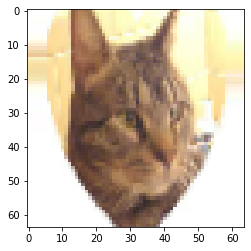

In [12]:
plt.imshow(training_data[0][63])

a = training_data[1][63]

if a == 0:
  print('Cat')
elif a == 1:
  print('Dog')
else:
  print('Incorrect prediction')

In [13]:
classifier = Sequential()

classifier.add(Conv2D(32,3,activation = 'relu', input_shape=(64,64,3)))
classifier.add(MaxPool2D())

classifier.add(Conv2D(64,3,activation = 'relu', input_shape=(64,64,3)))
classifier.add(MaxPool2D())

classifier.add(Conv2D(128,3,activation = 'relu', input_shape=(64,64,3)))
classifier.add(MaxPool2D())

classifier.add(Flatten())

classifier.add(Dense(128, activation = 'relu'))

classifier.add(Dense(64, activation = 'relu'))

classifier.add(Dense(32, activation = 'relu'))

classifier.add(Dense(1, activation = 'sigmoid'))

In [14]:
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
history = classifier.fit(training_set, epochs = 10, validation_data=test_set)

Epoch 1/10
101/101 [==============================] - 1535s 15s/step - loss: 0.6887 - accuracy: 0.5266 - val_loss: 0.6704 - val_accuracy: 0.5964
Epoch 2/10
101/101 [==============================] - 42s 412ms/step - loss: 0.6310 - accuracy: 0.6454 - val_loss: 0.6111 - val_accuracy: 0.6685
Epoch 3/10
101/101 [==============================] - 42s 414ms/step - loss: 0.5764 - accuracy: 0.6965 - val_loss: 0.6068 - val_accuracy: 0.7035
Epoch 4/10
101/101 [==============================] - 42s 419ms/step - loss: 0.5412 - accuracy: 0.7237 - val_loss: 0.5277 - val_accuracy: 0.7509
Epoch 5/10
101/101 [==============================] - 42s 414ms/step - loss: 0.5158 - accuracy: 0.7542 - val_loss: 0.4633 - val_accuracy: 0.7775
Epoch 6/10
101/101 [==============================] - 42s 415ms/step - loss: 0.4804 - accuracy: 0.7654 - val_loss: 0.4439 - val_accuracy: 0.7977
Epoch 7/10
101/101 [==============================] - 42s 413ms/step - loss: 0.4642 - accuracy: 0.7760 - val_loss: 0.4282 - val_ac

In [15]:
Y_pred_test = classifier.predict(test_set)
Y_pred_test.shape

(2027, 1)

'Cat'

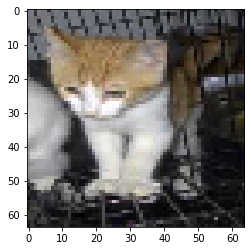

In [16]:
classes = ['Cat', 'Dog']
plt.imshow(test_set[0][0][35])
classes[int(test_set[0][1][35])]

In [17]:
#print(test_set[0][1])

In [17]:
print(f'Accuracy is : {accuracy_score(test_set[0][1], Y_pred_test.round())}')
print(f'F1 Score is : {f1_score(test_set[0][1], Y_pred_test.round(), average= "weighted")}.')
print(f'Precision is : {precision_score(test_set[0][1], Y_pred_test.round(), average="weighted")}.')
print(f'Recall is : {recall_score(test_set[0][1], Y_pred_test.round(), average = "weighted")}.')


Accuracy is : 0.4997533300444006
F1 Score is : 0.4997375016113013.
Precision is : 0.49974599995624036.
Recall is : 0.4997533300444006.


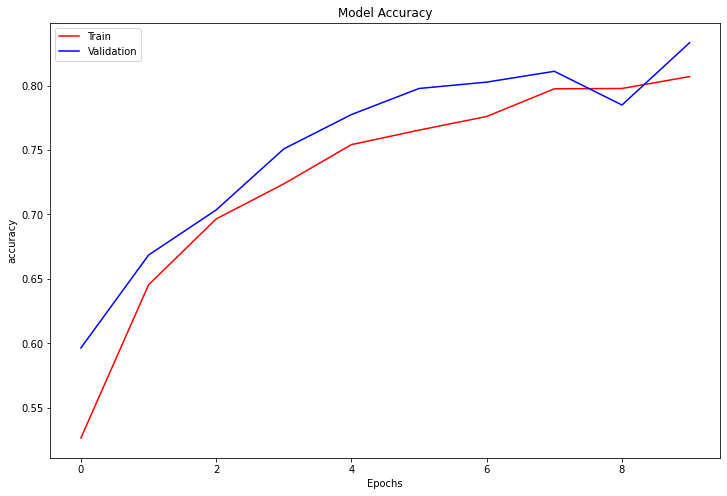

In [18]:
plt.figure(figsize = (12,8))
plt.plot(history.history['accuracy'], color = 'red', label = 'Train')
plt.plot(history.history['val_accuracy'], color = 'blue', label = 'Validation')
plt.ylabel('accuracy')
plt.xlabel('Epochs')
plt.title('Model Accuracy')
plt.legend()
plt.show()

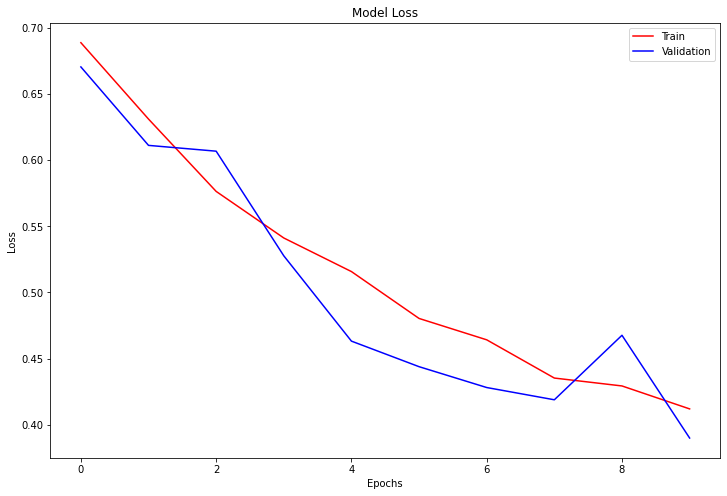

In [19]:
plt.figure(figsize = (12,8))
plt.plot(history.history['loss'], color = 'red', label = 'Train')
plt.plot(history.history['val_loss'], color = 'blue', label = 'Validation')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.title('Model Loss')
plt.legend()
plt.show()

In [20]:
classifier.save(r'/content/drive/MyDrive/Colab Notebooks/Deep Learning Projects/Cat and Dog/cat_and_dog_80.h5')

In [23]:
from keras.models import load_model

model = load_model('/content/drive/MyDrive/Colab Notebooks/Deep Learning Projects/Cat and Dog/cat_and_dog_trained.h5')

# # read the image
test_image = image.load_img('/content/drive/MyDrive/Colab Notebooks/Deep Learning Projects/Cat and Dog/Images from Web JPEG/1Cat.jpg',
                            target_size=(64,64))

# # image to array
test_image = image.img_to_array(test_image)
test_image = image.smart_resize(test_image, (64,64))

test_image = test_image.reshape(1,64,64,3)

result = model.predict(test_image)

if [result[0] > 0.5][0] == True:
  print('dog')

else:
  print('cat')



cat
